# Machine Learning Basics: Series

There is a series on TDS that contains information on Machine Learning Basics and this is going to inform the usage of various machine learning basics.

## Simple Linear Regression
Simple Linear Regression is of the form $y = wx + b$, where y is the dependent variable, x is the independent variable, w and b are the training parameters which are to be optimized during training process to get accurate predictions.

$$
y=mx + b
$$

### Simple Linear Regression

Post - [TDS](https://towardsdatascience.com/machine-learning-basics-simple-linear-regression-bc83c01baa07)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

In [3]:
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',None)

In [4]:
from IPython.core.display import display, HTML

In [6]:
display(HTML("<style>.container{width:100% !important;</style>"))

#### Importing the Dataset

In [25]:
url = 'https://raw.githubusercontent.com/mk-gurucharan/Regression/master/Salary_Data.csv'

In [24]:
dataset = pd.read_csv(url)

In [9]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [11]:
dataset.shape

(30, 2)

In [8]:
X = dataset.iloc[:, :-1].values

In [12]:
y = dataset.iloc[:,-1]

In [14]:
from sklearn.model_selection import train_test_split as tts

In [15]:
X_train, X_test, y_train,y_test = tts(X,y,test_size=0.2,random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression()

In [18]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
df = pd.DataFrame({'Real Values': y_test,'Predicted Values':y_pred})

In [22]:
df

,Real Values,Predicted Values
17,83088.0,75074.505110
21,98273.0,91873.805638
10,63218.0,62008.382477
19,93940.0,81607.566426
14,61111.0,67608.149319
20,91738.0,89073.922217


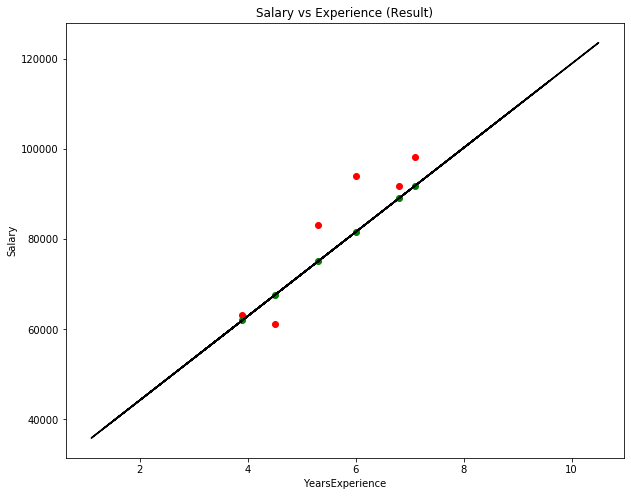

In [28]:
plt.figure(figsize=(10,8));
plt.scatter(X_test,y_test,color='red')
plt.scatter(X_test,y_pred,color ='green')
plt.plot(X_train,regressor.predict(X_train),color='black')
plt.title('Salary vs Experience (Result)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

### Mean Square Error

$$
MSE = \frac{1}{N}\sum\limits_{n}^{i=1} (Y_i - \hat{Y})
$$

In [54]:
print('The coefficient of X is {:,.2f} and the intercept is {:,.2f}'.format((regressor.coef_[0]),(regressor.intercept_)))

The coefficient of X is 9,332.94 and the intercept is 25,609.90


In [55]:
regressor.coef_,regressor.intercept_

(array([9332.94473799]), 25609.89799835482)

25609.89799835482

In [60]:
slm_score = regressor.score(X_test, y_test)
print("{:.2%}".format(slm_score), ' of the variation in the Salaries is explained by the Years of Experience')

76.17%  of the variation in the Salaries is explained by the Years of Experience


In [64]:
from sklearn.metrics import mean_squared_error

import math

y_predict = regressor.predict(X_test)

regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

rsme = math.sqrt(regression_model_mse)

In [67]:
print('The MSE of X is {:,.2f} and the RSME is {:,.2f}'.format(regression_model_mse,rsme))

The MSE of X is 51,338,023.49 and the RSME is 7,165.06
